In [45]:
import pandas as pd
from plotnine import aes, ggplot, geom_point, geom_line, facet_wrap

In [53]:
dados = pd.read_csv(r'./1_dados_wiki_brasileiro_clean.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 16 columns):
Data                 3420 non-null object
Ano                  3420 non-null int64
Mes                  3420 non-null int64
Dia                  3420 non-null int64
Serie                3420 non-null object
Campeonato           3420 non-null object
Estadio              3420 non-null object
Hora                 3420 non-null object
Publico              3342 non-null float64
Renda                1334 non-null float64
Mandante             3420 non-null object
Visitante            3420 non-null object
GolsMandante         3420 non-null int64
GolsVisitante        3420 non-null int64
GolsDiff             3420 non-null int64
ResultadoMandante    3420 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 427.6+ KB


In [54]:
dados.head()

,Data,Ano,Mes,Dia,Serie,Campeonato,Estadio,Hora,Publico,Renda,Mandante,Visitante,GolsMandante,GolsVisitante,GolsDiff,ResultadoMandante
0,2009-05-09,2009,5,9,A,Brasileiro,"Ilha do Retiro, Recife",18:30:00,16019.0,NaN,Sport,Barueri,1,1,0,empate
1,2009-05-09,2009,5,9,A,Brasileiro,"Estádio Palestra Itália, São Paulo",18:30:00,19105.0,NaN,Palmeiras,Coritiba,2,1,1,vitoria
2,2009-05-09,2009,5,9,A,Brasileiro,"Ressacada, Florianópolis",18:30:00,9174.0,NaN,Avaí,Atlético-MG,2,2,0,empate
3,2009-05-10,2009,5,10,A,Brasileiro,"Pacaembu, São Paulo",16:00:00,14458.0,NaN,Corinthians,Internacional,0,1,-1,derrota
4,2009-05-10,2009,5,10,A,Brasileiro,"Maracanã, Rio de Janeiro",16:00:00,14547.0,NaN,Fluminense,SãoPaulo,1,0,1,vitoria


In [57]:
dados['Mandante'].unique()

array(['Sport', 'Palmeiras', 'Avaí', 'Corinthians', 'Fluminense',
       'Cruzeiro', 'Atlético-PR', 'Grêmio', 'SantoAndré', 'Goiás',
       'Flamengo', 'Coritiba', 'Atlético-MG', 'SãoPaulo', 'Barueri',
       'Internacional', 'Santos', 'Botafogo', 'Vitória', 'Náutico',
       'Bragantino', 'Campinense', 'PontePreta', 'Figueirense',
       'Fortaleza', 'VilaNova', 'Bahia', 'VascodaGama', 'Juventude',
       'AméricadeNatal', 'Portuguesa', 'AtléticoGoianiense', 'Paraná',
       'DuquedeCaxias', 'ABC', 'SãoCaetano', 'Ceará', 'Guarani',
       'Ipatinga', 'Brasiliense', 'AtléticoMineiro', 'GrêmioPrudente',
       'AtléticoParanaense', 'ASA', 'AméricaMineiro', 'Icasa',
       'Guaratinguetá', 'Salgueiro', 'Americana', 'Criciúma', 'Ituiutaba',
       'GrêmioBarueri', 'BoaEsporte', 'CRB', 'Joinville', 'Oeste',
       'Paysandu', 'Chapecoense', 'SampaioCorrêa', 'SantaCruz',
       'Luverdense', 'MogiMirim', 'Macaé', 'Tupi', 'BrasildePelotas',
       'Londrina'], dtype=object)

In [58]:
dados[dados['Mandante'] == 'Palmeiras']

,Data,Ano,Mes,Dia,Serie,Campeonato,Estadio,Hora,Publico,Renda,Mandante,Visitante,GolsMandante,GolsVisitante,GolsDiff,ResultadoMandante
1,2009-05-09,2009,5,9,A,Brasileiro,"Estádio Palestra Itália, São Paulo",18:30:00,19105.0,NaN,Palmeiras,Coritiba,2,1,1,vitoria
26,2009-05-24,2009,5,24,A,Brasileiro,"Parque Antartica, São Paulo",16:00:00,12023.0,NaN,Palmeiras,SãoPaulo,0,0,0,empate
43,2009-06-07,2009,6,7,A,Brasileiro,"Estádio Palestra Itália, São Paulo",16:00:00,16118.0,NaN,Palmeiras,Vitória,2,1,1,vitoria
58,2009-06-14,2009,6,14,A,Brasileiro,"Estádio Palestra Itália, São Paulo",18:30:00,11214.0,NaN,Palmeiras,Cruzeiro,3,1,2,vitoria
76,2009-06-28,2009,6,28,A,Brasileiro,"Estádio Palestra Itália, São Paulo",18:30:00,8277.0,NaN,Palmeiras,Santos,1,1,0,empate
91,2009-07-11,2009,7,11,A,Brasileiro,"Estádio Palestra Itália, São Paulo",18:30:00,7800.0,NaN,Palmeiras,Náutico,4,1,3,vitoria
111,2009-07-18,2009,7,18,A,Brasileiro,"Estádio Palestra Itália, São Paulo",18:30:00,19041.0,NaN,Palmeiras,SantoAndré,1,0,1,vitoria
144,2009-07-29,2009,7,29,A,Brasileiro,"Estádio Palestra Itália, São Paulo",21:50:00,16301.0,NaN,Palmeiras,Fluminense,1,0,1,vitoria
168,2009-08-06,2009,8,6,A,Brasileiro,"Estádio Palestra Itália, São Paulo",21:00:00,25440.0,NaN,Palmeiras,Grêmio,1,1,0,empate
182,2009-08-15,2009,8,15,A,Brasileiro,"Estádio Palestra Itália, São Paulo",18:30:00,24231.0,NaN,Palmeiras,Botafogo,1,1,0,empate


/home/eric-barbosa/.local/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


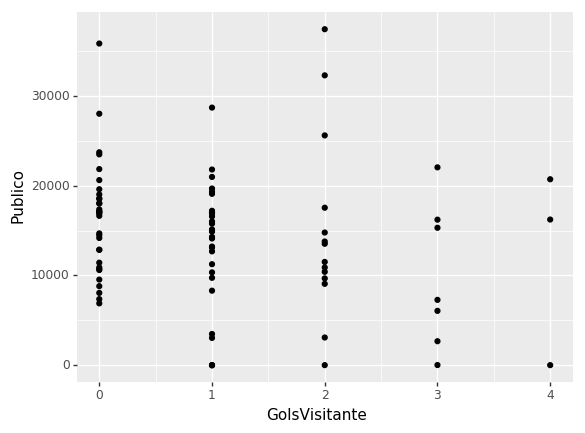

<ggplot: (-9223363307528234443)>

In [59]:
(ggplot(dados[dados['Mandante'] == 'Sport'], aes('GolsVisitante', 'Publico')) +
    geom_point())